# loading data

In [1]:
import pandas as pd
%matplotlib inline
df = pd.io.json.read_json("./data.json")
df.shape

(3224, 25)

In [2]:
df.tail(2)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,lang,place,possibly_sensitive,retweet_count,retweeted,retweeted_status,source,text,truncated,user
998,NaN,NaN,2014-09-08 19:40:10,"{u'symbols': [], u'user_mentions': [], u'hasht...",None,1497,False,NaN,509063664482017281,509063664482017280,...,en,NaN,0,1008,False,None,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",It's been more than five years since the natio...,False,"{u'follow_request_sent': False, u'profile_use_..."
999,NaN,NaN,2014-09-08 18:30:38,"{u'symbols': [], u'user_mentions': [{u'indices...",None,728,False,NaN,509046165543731200,509046165543731200,...,en,NaN,0,373,False,None,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Watch: Congress is back this week. Time to dem...,False,"{u'follow_request_sent': False, u'profile_use_..."


In [3]:
from unidecode import unidecode
def get_entitie(obj, key, name):
    return [unidecode(entity.get(key, u'').lower()) for entity in obj[name]]

hashtags_series = df.entities.apply(lambda obj: get_entitie(obj, 'text', 'hashtags')).dropna()
mentions_series = df.entities.apply(lambda obj: get_entitie(obj, 'screen_name', 'user_mentions')).dropna()

In [4]:
hashtags = pd.Series(hashtags_series.sum())
mentions = pd.Series(mentions_series.sum())

In [5]:
hashtag_counts = hashtags.value_counts().head(10)
hashtag_counts

raisethewage         181
actonclimate         154
getcovered           138
opportunityforall    113
sotu                 104
obamacare             66
getcoverednow         60
immigrationaction     58
actonreform           52
thisiswhy             48
dtype: int64

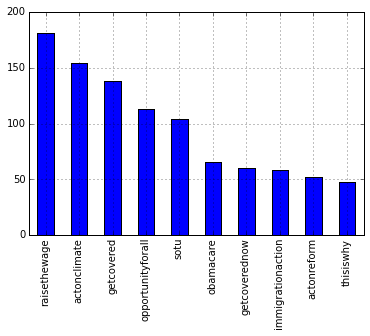

In [6]:
hashtag_counts.plot(kind='bar')

In [7]:
mentions_count = mentions.value_counts().head(10)
mentions_count

ofa             157
whitehouse       99
vp               24
flotus           24
obamacare        14
epa               8
senatorreid       7
vj44              6
voxdotcom         6
getcoveredus      6
dtype: int64

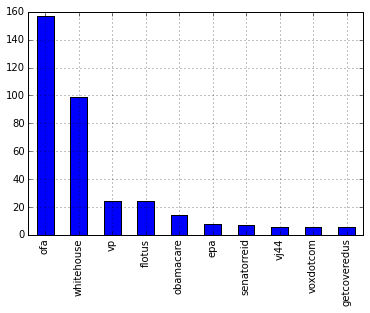

In [8]:
mentions_count.plot(kind='bar')